# Предсказание оттока сотрудников (с помощью нейронной сети)

Источник данных: https://www.kaggle.com/datasets/patelprashant/employee-attrition

## Автор: __Жуков Николай__  #TODO

### Процесс анализа данных (план работы):
1. Загрузим данные для обучения и тестирования
2. Предобработаем данные
3. Создадим модель для обучения
4. Обучим модель
5. Протестируем модель
6. Попробуем улучшить модель

In [ ]:
!pip install tensorflow
!pip install keras
!pip install keras.utils

In [ ]:
import matplotlib.pyplot as plt # загружаем библиотеку и для простоты обращения в коде называем её сокращенно plt
import numpy as np
import pandas as pd

In [ ]:
import keras
# Последовательный тип модели
from keras.models import Sequential
# Импортируем полносвязный слой, слои активации и слой, превращающий картинку в вектор
from keras.layers import Dense, Activation

In [ ]:
# Эти библиотеки отключают лишние предупреждения от библиотек, в частности,
# tensorflow, чтобы не засорять вывод наших результатов
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
from tensorflow.python.util import deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf

## 1. Загрузим данные для обучения и тестирования

In [ ]:
%%capture
!wget https://www.dropbox.com/s/jaea4smqjbmslsb/training_data.csv
!wget https://www.dropbox.com/s/y1i45d72k9byzak/test_data.csv

In [ ]:
training_data = pd.read_csv('training_data.csv')
test_data = pd.read_csv('test_data.csv')

training_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3308 entries, 0 to 3307
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      3308 non-null   int64  
 1   BusinessTravel           3308 non-null   object 
 2   Department               3308 non-null   object 
 3   DistanceFromHome         3308 non-null   int64  
 4   Education                3308 non-null   int64  
 5   EducationField           3308 non-null   object 
 6   Gender                   3308 non-null   object 
 7   JobRole                  3308 non-null   object 
 8   MaritalStatus            3308 non-null   object 
 9   MonthlyIncome            3308 non-null   int64  
 10  NumCompaniesWorked       3293 non-null   float64
 11  PercentSalaryHike        3308 non-null   int64  
 12  StandardHours            3308 non-null   int64  
 13  StockOptionLevel         3308 non-null   int64  
 14  TotalWorkingYears       

## 2. Предобработаем данные

### 2.1. Удаление пропусков

 Реализуем стратегию удаления строк, в которых отсутствует хотя бы часть данных

In [ ]:
# Удалим пропуски в тренировочном наборе данных
training_data.dropna(axis=0, inplace=True)
training_data.shape

(3286, 20)

In [ ]:
# Удалим пропуски в тестовом наборе данных
test_data.dropna(axis=0, inplace=True)
test_data.shape

(1096, 20)

### Выделение целевого столбца

In [ ]:
# Выделяем в отдельный столбец целевой атрибут
target_variable_name = 'Attrition'
train_values = training_data[target_variable_name]
test_values = test_data[target_variable_name]

In [ ]:
# Удаляем целевой атрибут из исходных наборов данных

train_points, test_points = training_data.drop(target_variable_name, 1), test_data.drop(target_variable_name, 1)

print(train_points.shape)
print(test_points.shape)

(3286, 19)
(1096, 19)


### 2.1. Замещение пропусков

Замещаем пропущенные значения какими-то значениями (средние значения).

In [ ]:
# TODO
# Попробуйте найти и использовать специальный метод
# для автоматического замещения пропущенных значения

In [ ]:
train_points['EducationField'].value_counts()

Life Sciences       1349
Medical             1051
Marketing            357
Technical Degree     293
Other                178
Human Resources       58
Name: EducationField, dtype: int64

### 2.2. Удаление столбцов с текстовыми данными
Удалим все столбцы, в которых содержатся текстовые данные.

Их всего 6, попробуем обойтись без них.

In [ ]:
text_features = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']

In [ ]:
# TODO

train_points.drop(columns=text_features, axis=1, inplace=True)


# training_values = training_data[target_variable_name]
# training_points = training_data.drop(target_variable_name, axis=1)

# for column in text_features:
#   train_points.drop(column, axis=1, inplace=True)
#   # dropped_values = training_data[column]

#   training_points = training_data.drop(column, axis=1)
#   # print(column)
#   # training_data.drop(column, axis=1, inplace = True)

In [ ]:
test_points.drop(columns=text_features, axis=1, inplace=True)
test_points.shape

(1096, 13)

In [ ]:
input_size = [train_points.shape[1]]*2

print(input_size)

[13, 13]


In [ ]:
# Создаем пустую модель
model = Sequential()


# Добавляем скрытый полносвязный слой из 3 нейронов
model.add(Dense(units=3, input_shape=input_size))
#И активацию для скрытого слоя нейронов
model.add(Activation('relu'))

# Добавляем выходной полносвязный слой из 2 нейронов
model.add(Dense(units=2))
# Чтобы получить на выходе вероятности для каждого класса, выбираем активацию
# softmax
model.add(Activation('softmax'))

model

In [ ]:
# Компилируем модель с функцией ошибки categorical entropy, оптимизатором Адам
# (оптимизатор, который со стандартным набором параметров может обучить эффективную
#  нейросеть), и метрикой - количеством правильно угаданных цифр.
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 13, 3)             42        
                                                                 
 activation_12 (Activation)  (None, 13, 3)             0         
                                                                 
 dense_13 (Dense)            (None, 13, 2)             8         
                                                                 
 activation_13 (Activation)  (None, 13, 2)             0         
                                                                 
Total params: 50 (200.00 Byte)
Trainable params: 50 (200.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
print(train_points.shape, train_values.shape)

output_col = pd.Series([0]*train_values.shape[0])
# train_values['output_col'] = output_col

print(train_points.shape, train_values.shape)

(3286, 13) (3286,)
(3286, 13) (3286,)


In [ ]:
# Несовпадения размерностей входных параметров для обучения нейронной сети
# train_points, train_values
# TODO
history_h = model.fit(train_points, train_values, epochs=10, batch_size=32, validation_data=(test_points, test_values))

Epoch 1/10
103/103 [==============================] - 1s 4ms/step - loss: 8284.6943 - accuracy: 0.1598 - val_loss: 5518.2104 - val_accuracy: 0.1642
Epoch 2/10
103/103 [==============================] - 0s 3ms/step - loss: 3407.3767 - accuracy: 0.1598 - val_loss: 1716.4633 - val_accuracy: 0.1642
Epoch 3/10
103/103 [==============================] - 0s 3ms/step - loss: 539.6220 - accuracy: 0.3907 - val_loss: 0.5407 - val_accuracy: 0.8358
Epoch 4/10
103/103 [==============================] - 0s 4ms/step - loss: 0.5327 - accuracy: 0.8402 - val_loss: 0.5301 - val_accuracy: 0.8358
Epoch 5/10
103/103 [==============================] - 0s 3ms/step - loss: 0.5219 - accuracy: 0.8402 - val_loss: 0.5197 - val_accuracy: 0.8358
Epoch 6/10
103/103 [==============================] - 0s 2ms/step - loss: 0.5114 - accuracy: 0.8402 - val_loss: 0.5096 - val_accuracy: 0.8358
Epoch 7/10
103/103 [==============================] - 0s 3ms/step - loss: 0.5014 - accuracy: 0.8402 - val_loss: 0.5001 - val_accuracy:

In [ ]:
model.evaluate(test_points, test_values)

35/35 [==============================] - 0s 3ms/step - loss: 0.4775 - accuracy: 0.8358


[0.47749194502830505, 0.8357664346694946]

In [ ]:
history_h.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

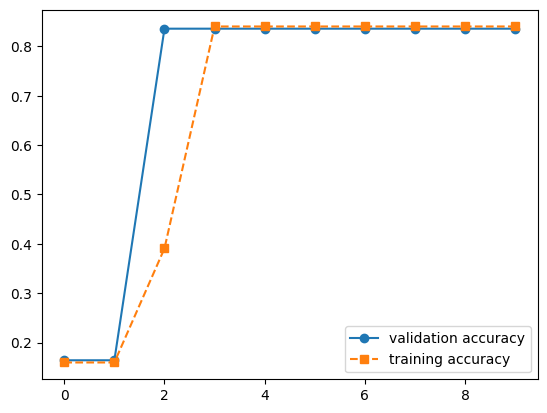

In [ ]:
plt.plot(history_h.history['val_accuracy'], '-o', label='validation accuracy')
plt.plot(history_h.history['accuracy'], '--s', label='training accuracy')
plt.legend();

### Задание для самостоятельной работы

1. После успешного обучения модели с помощью метода fit и тренировочных данных,  использовать функцию evaluate для оценки работы нейронной сети с тестовыми данными (проверить их формат
и убедиться, что их структура аналогична тренировочным данным).

2. Отобразить в отчете после этого задания какой результат точности был получен и при каких параметрах (количество эпох, размер батча и т. д.)

3. Создать график зависимости точности работы сети в зависимости от кол-ва эпох (для тренировочной и тестовой выборок).

4. Понять есть ли переобучение и от чего это зависит.

5. Преобразовать с помощью LabelEncoder текстовые (категориальные признаки) и выполнить этапы обучения и тестирования с использованием этих данных и признаков.